In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.svm import SVC
from sklearn.svm import SVR
import seaborn as sns
from pathlib import Path
import os.path

In [4]:
dataset_path = Path("/Users/irmaspahiu/Desktop/CHEM 4H03/SVM-Image-Recognition/flowers")
filepaths = list(dataset_path.glob(r'**/*.jpg'))
classes = ["daisy", "dandelion", "rose", "sunflower", "tulip"]

#extract labels from filepaths
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths=pd.Series(filepaths,name='Filepath').astype(str) 
labels=pd.Series(labels,name='Label')
img_array=pd.Series(name='Image')          
image_df = pd.concat([filepaths, labels], axis=1) 

#shuffle the data
image_df = image_df.sample(frac=1).reset_index(drop = True)

#init RGB array for images
image_array = []

#resize all images to 64x64 using pillow
for i in range(2281):
    img = Image.open(image_df['Filepath'][i])
    #print the image
    #resize the image
    img = img.resize((64,64))
    img = img.convert('RGB')
    #save the image
    img.save(image_df['Filepath'][i])
    img_array = np.array(img)
    img_array = img_array.flatten()
    image_array.append(img_array)

#add image array to the dataframe
image_df['RGB_Values'] = image_array

#remove data randomly for performance

In [5]:
image_df.head(5)

,Filepath,Label,RGB_Values
0,/Users/irmaspahiu/Desktop/CHEM 4H03/SVM-Image-...,daisy,"[182, 174, 137, 182, 174, 135, 170, 163, 121, ..."
1,/Users/irmaspahiu/Desktop/CHEM 4H03/SVM-Image-...,rose,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,/Users/irmaspahiu/Desktop/CHEM 4H03/SVM-Image-...,daisy,"[64, 44, 17, 68, 48, 21, 64, 44, 17, 72, 52, 2..."
3,/Users/irmaspahiu/Desktop/CHEM 4H03/SVM-Image-...,sunflower,"[4, 0, 1, 4, 0, 1, 4, 0, 3, 4, 0, 3, 2, 0, 5, ..."
4,/Users/irmaspahiu/Desktop/CHEM 4H03/SVM-Image-...,sunflower,"[182, 218, 254, 180, 218, 254, 175, 218, 252, ..."


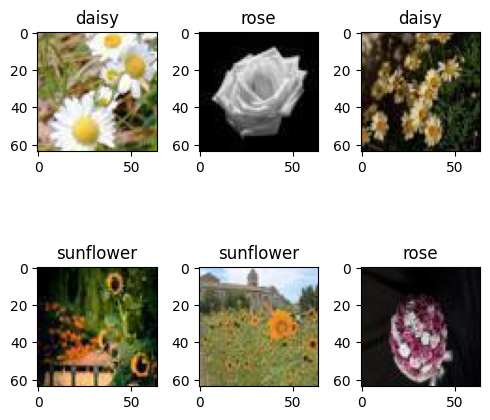

In [6]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(5,5),subplot_kw={})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

In [7]:
#use the RGB values to train the smodel
from sklearn import svm
#use grid search to find the best parameters
from sklearn.model_selection import GridSearchCV
params = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001], 'kernel':['rbf','linear','poly']}
svc=svm.SVC(probability=True)

#create the model
model = GridSearchCV(svc, params, cv=3,n_jobs=-1)

#split the data into training and testing
from sklearn.model_selection import train_test_split
X = np.array(list(image_df['RGB_Values']))
y = np.array(list(image_df['Label']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#train the model
model.fit(X_train, y_train)

#predict the labels
y_pred = model.predict(X_test)

#calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6301969365426696


In [8]:
print(model.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


In [9]:
print(model)

GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']})
